In [245]:
# import
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import h3


def lat_lng_to_h3(lat, lng, resolution):
    # Convert latitude and longitude to H3 index
    h3_index = h3.geo_to_h3(lat, lng, resolution)
    return h3_index





In [246]:
# load data 
df = pd.read_csv('./bristol_density.csv')



In [247]:
# load data 
df1 = pd.read_csv('./Bristol charging points.csv')

In [248]:
resolution = 7
hex_col = 'hex'+str(resolution)

# find hexs containing the points
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)
df1[hex_col] = df1.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)


In [249]:
df1.columns

Index(['chargeDeviceID', 'reference', 'name', 'Latitude', 'Longitude',
       'subBuildingName', 'buildingName', 'buildingNumber', 'thoroughfare',
       'street',
       ...
       'connector8OutputCurrent', 'connector8RatedVoltage',
       'connector8ChargeMethod', 'connector8ChargeMode',
       'connector8TetheredCable', 'connector8Status', 'connector8Description',
       'connector8Validated', 'total_connectors', 'hex7'],
      dtype='object', length=160)

In [250]:
df.head()

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,hex7
0,18042,N,2014,2014-09-30 00:00:00,7,1,South West,E12000009,144,"Bristol, City of",...,345,39.0,15.0,7.0,1.0,5,6.0,73.0,1578.0,871958390ffffff
1,18042,N,2014,2014-09-30 00:00:00,8,1,South West,E12000009,144,"Bristol, City of",...,397,31.0,6.0,5.0,3.0,10,7.0,62.0,1777.0,871958390ffffff
2,18042,N,2014,2014-09-30 00:00:00,9,1,South West,E12000009,144,"Bristol, City of",...,328,38.0,9.0,10.0,0.0,12,11.0,80.0,1379.0,871958390ffffff
3,18042,N,2014,2014-09-30 00:00:00,10,1,South West,E12000009,144,"Bristol, City of",...,267,35.0,8.0,9.0,7.0,12,4.0,75.0,1180.0,871958390ffffff
4,18042,N,2014,2014-09-30 00:00:00,11,1,South West,E12000009,144,"Bristol, City of",...,267,32.0,9.0,14.0,0.0,21,7.0,83.0,1224.0,871958390ffffff


In [251]:
df1.head()

,chargeDeviceID,reference,name,Latitude,Longitude,subBuildingName,buildingName,buildingNumber,thoroughfare,street,...,connector8OutputCurrent,connector8RatedVoltage,connector8ChargeMethod,connector8ChargeMode,connector8TetheredCable,connector8Status,connector8Description,connector8Validated,total_connectors,hex7
0,ac7a21c48f5833b33a5b606b2089e6a9,CM167,NCP Prince Street Car Park,51.450340,-2.596704,NaN,NaN,NaN,NaN,Prince Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,87195876cffffff
1,a999c0cab150490ffefb7ce9ec889830,CYC60469,Longwell Green Leisure Centre,51.449065,-2.500966,Aspects Leisure Park,Longwell Green Leisure Centre,NaN,NaN,Leisure Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,871958382ffffff
2,6928deac51a9dcc1f063ccec46d3c067,CYC60466,Bradley Stoke Leisure Centre,51.535657,-2.545928,NaN,Bradley Stoke Leisure Centre,NaN,NaN,Fiddlers Wood Ln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8719580ebffffff
3,a76a25b08df9964728e96bc8c8720e5d,60467,Memorial Woodlands,51.571359,-2.498436,NaN,Memorial Woodlands,Memorial Woodlands,Earthcott Road,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8719580edffffff
4,beab105a740056efe867b95bcb90b82d,CM22571,Cribbs Causeway Retail Park,51.526138,-2.600600,NaN,NaN,NaN,Lysander Road,Patchway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8719580c8ffffff


In [252]:
df['total_car']=df.groupby(hex_col)['All_motor_vehicles'].transform('sum')
df1['total_charger']=df1.groupby(hex_col)['total_connectors'].transform('sum')

In [253]:
df[hex_col].value_counts()

hex7
871958390ffffff    2868
87195876cffffff    2748
871958766ffffff    2388
871958392ffffff    2364
871958393ffffff    2304
                   ... 
871958744ffffff      24
871958382ffffff      24
871958752ffffff      24
87195862cffffff      24
87195874dffffff      24
Name: count, Length: 83, dtype: int64

In [254]:
k = 2
for s_indexed in df1[hex_col].loc[0:10]:
    # Use the hex string directly without converting it to an integer
    neighboring = h3.k_ring(s_indexed, k)
    print('for ' +s_indexed )
    print("Neighbors:")
    for neighbor in neighboring:
        print(neighbor)

for 87195876cffffff
Neighbors:
87195876effffff
87195839affffff
87195876affffff
871958745ffffff
871958768ffffff
871958769ffffff
871958393ffffff
871958391ffffff
871958392ffffff
87195839effffff
871958765ffffff
87195876cffffff
871958390ffffff
871958396ffffff
87195876bffffff
87195876dffffff
871958761ffffff
871958760ffffff
871958763ffffff
for 871958382ffffff
Neighbors:
871958384ffffff
871958383ffffff
8719583b1ffffff
871958394ffffff
87195839cffffff
871958393ffffff
871958395ffffff
871958391ffffff
87195839dffffff
871958381ffffff
87195839effffff
871958390ffffff
871958386ffffff
871958382ffffff
87195838effffff
871958380ffffff
871958385ffffff
871958398ffffff
8719583b3ffffff
for 8719580ebffffff
Neighbors:
8719580e9ffffff
8719580c5ffffff
8719580cdffffff
8719583b4ffffff
8719580c1ffffff
87195805affffff
8719580eeffffff
8719580e8ffffff
8719583b0ffffff
8719580eaffffff
8719580c9ffffff
8719580ebffffff
8719580ecffffff
8719583b2ffffff
8719580ceffffff
8719580ccffffff
8719583b6ffffff
8719580c8ffffff
8719580edff

In [255]:
df2=df[[hex_col,'total_car']]
df2=df2.drop_duplicates(subset=[hex_col, 'total_car'])

In [256]:
df3=df1[[hex_col,'total_charger']]
df3=df3.drop_duplicates(subset=[hex_col, 'total_charger'])

In [257]:
df2=pd.merge(df2,df3[[hex_col,'total_charger']],on=hex_col,how='left')

In [258]:

df2.fillna(0, inplace=True)
#df2.to_csv('./Result.csv')


In [259]:
# calculate distance between two H3 cells
def calculate_grid_distance(start_index, end_index):
    # Calculate the grid distance between two H3 cells
    distance = h3.h3_distance(start_index, end_index)
    return distance


In [272]:
listofcharger1=df2[df2.total_charger>0][[hex_col,'total_charger']]

In [273]:
listofcharger1.head()

,hex7,total_charger
0,871958390ffffff,20.0
2,871958394ffffff,6.0
3,87195876cffffff,62.0
4,871958771ffffff,6.0
6,871958766ffffff,2.0


In [314]:



def getchargercount1(start_index,k=1):
    total=0
    charger_count=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger1[hex_col].to_list():
            total=total+1
            charger_count=charger_count+listofcharger1[listofcharger1[hex_col]==n]['total_charger'].values
    return pd.Series([total, charger_count], index=['total_number_of_cell','charger_count'])



In [317]:
result=getchargercount1('871958390ffffff',0)
print(result)

total_number_of_cell         1
charger_count           [20.0]
dtype: object


In [260]:
#it is a simple script to get the list of hexagons with chargers
listofcharger=df2[df2.total_charger>0][hex_col].to_list()

In [261]:
#it finds closest charging neighborhood
def calculate_min_grid_distance(start_index,listofcharger):
    low_distance=100
    for i in range(0,len(listofcharger)) :
        grid_distance = calculate_grid_distance(start_index, listofcharger[i])
        
        if grid_distance < low_distance:
            low_distance = grid_distance
            closest_charger = listofcharger[i]
    return pd.Series([low_distance, closest_charger], index=['min_k', 'min_k_hex'])



In [262]:
#testing distance
result1=calculate_min_grid_distance('8719586e4ffffff',listofcharger)
print(result1[0])

0


In [263]:



def getchargercount(start_index,k=1):
    total=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger:
            total=total+1
    return total



In [264]:
df2[['min_k','min_k_hex']] = df2[hex_col].apply(lambda x: calculate_min_grid_distance(x, listofcharger)) 

In [265]:
df2['total_number_of_cell']=df2[[hex_col,'min_k']].apply(lambda x: getchargercount(x[hex_col],x['min_k']),axis=1)   

In [318]:
df2[['total_number_of_cell','charger_count']]=df2[[hex_col,'min_k']].apply(lambda x: getchargercount1(x[hex_col],x['min_k']),axis=1)   

In [319]:
df2.head(100)

,hex7,total_car,total_charger,min_k,min_k_hex,total_number_of_cell,charger_count
0,871958390ffffff,2516500.0,20.0,0,871958390ffffff,1,[20.0]
1,871958768ffffff,811065.0,0.0,1,87195876cffffff,4,[88.0]
2,871958394ffffff,890256.0,6.0,0,871958394ffffff,1,[6.0]
3,87195876cffffff,2313234.0,62.0,0,87195876cffffff,1,[62.0]
4,871958771ffffff,2829649.0,6.0,0,871958771ffffff,1,[6.0]
...,...,...,...,...,...,...,...
78,8719580caffffff,18102.0,13.0,0,8719580caffffff,1,[13.0]
79,8719580c8ffffff,167.0,26.0,0,8719580c8ffffff,1,[26.0]
80,8719586e1ffffff,245.0,0.0,2,8719586e4ffffff,3,[26.0]
81,871958662ffffff,1482.0,0.0,1,871958666ffffff,1,[5.0]


In [267]:
df2.to_csv('./closest_chargers.csv', index=False)

In [268]:
#testing
result=getchargercount('871958390ffffff',1)
print(result)

6


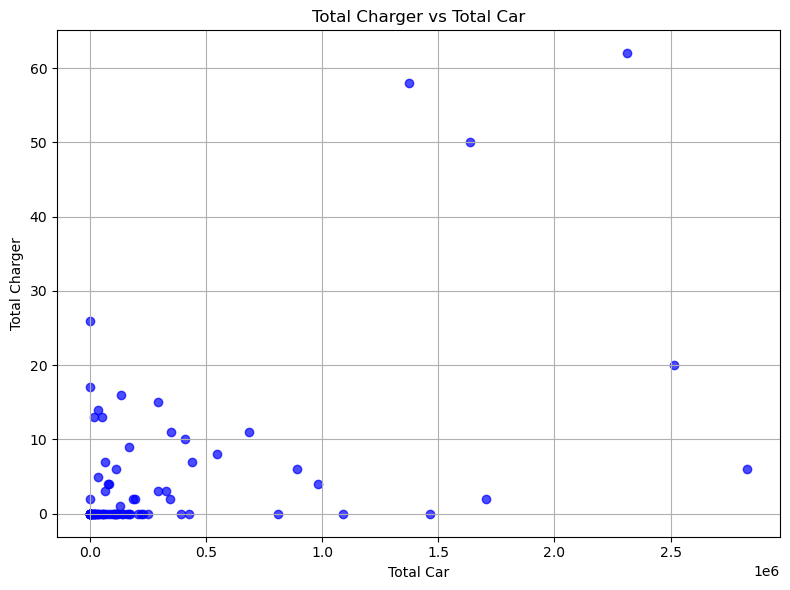

In [269]:
import matplotlib.pyplot as plt

# Define your data
total_car = df2.total_car.to_list()
total_charger = df2.total_charger.to_list()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_car, total_charger, color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.title('Total Charger vs Total Car')
plt.xlabel('Total Car')
plt.ylabel('Total Charger')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [270]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the data
total_car = df2.total_car.to_list()
total_charger = df2.total_charger.to_list()
# Convert lists to numpy arrays
X = np.array(total_car).reshape(-1, 1)  # Feature matrix
y = np.array(total_charger)             # Target vector

# Define polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.00000000e+00  1.51769633e-05 -2.06793289e-12]
Intercept: 1.1247887136231522
